# Setup

In [1]:
%reset -f

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import importlib, os, ipywidgets

from lib import path_tools as pt
from lib import import_data
from lib import analysis

# XRD

In [4]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "xrd"

In [5]:
importlib.reload(import_data)

<module 'lib.import_data' from '/home/tomas/Documents/sciencetools_py/lib/import_data.py'>

In [6]:
# Identify the folder(s) where the raw, original data is
# Use a dict to store multiple directories that you want ready to plot
XRD_data = {}

samples_dir = {
    "etb046": "190722 ETB-046 MAPbI on glass FF/",
    "etb047": "190903 ETB-047 MAPbI on glass FF/",
    "etb048": "190904 ETB-048 MAPbI on glass FF/",
    "etb052": "191107 ETB-052 MAPbI on glass FF Growth Temp/",
    "etb054": "191111 ETB-054 MAPbI on glass FF growth temp/",
    "etb056": "191114 ETB-056 MAPbI on glass FF growth temp/",
}

for run_ID in samples_dir.keys():
    XRD_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.
Creating new local data folder.
Creating new local data folder.
Creating new local data folder.
Creating new local data folder.
Creating new local data folder.


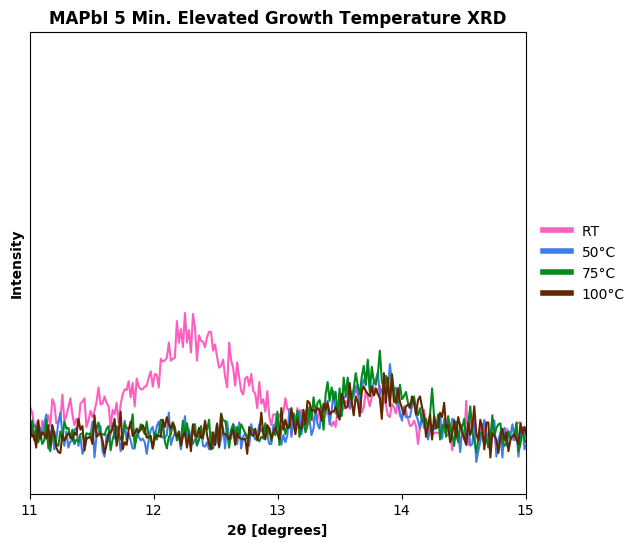

In [13]:
fig2 = plt.figure(1, figsize=[6.4, 6])
fig_ax = plt.gca()

offset = 0
lbl = None

master_cypher = (
#     "15min",
#     "15min 50C",
#     "15min 75C",
#     "15min 100C",
#     "1min",
#     "1min 50C",
#     "1min 75C",
#     "1min 100C",
    "5min",
    "5min 50C",
    "5min 75C",
    "5min 100C",
)

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in XRD_data[run_ID].keys():
            samplemax = max(np.log10(XRD_data[run_ID][sample_ID]["counts"]))
            
            if "15min" in sample_ID:
                lbl = sample_ID.replace("15min ", "")
            elif "5min" in sample_ID:
                lbl = sample_ID.replace("5min ", "")
            elif "1min" in sample_ID:
                lbl = sample_ID.replace("1min ", "")
            
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
            else:
                lbl = "RT"
                
            plt.figure(1)
            plt.plot(XRD_data[run_ID][sample_ID]["2theta"], XRD_data[run_ID][sample_ID]["counts"],
                     label=lbl)
            
#             offset += samplemax
            
plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(4, rot=2, hue=2, light=0.6, dark=0.2))
    

plt.xlabel("2θ [degrees]", weight="semibold")
plt.ylabel("Intensity", weight="semibold")

plt.xlim(11, 15)
# fig_ax.set_ylim(bottom=2)

# fig_ax.set_yticklabels([])
plt.yticks([])
# fig_ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.xticks(range(11, 16, 1))

plt.title("MAPbI 5 Min. Elevated Growth Temperature XRD",weight="semibold")

leg = plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1),mode='expand', frameon=False)
for i in leg.legendHandles:
    i.set_linewidth(4)   

In [14]:
fig2.savefig("plots/final/XRD/MAPbI Temp/5min_overlay.png", dpi=200, format='png', bbox_inches='tight')

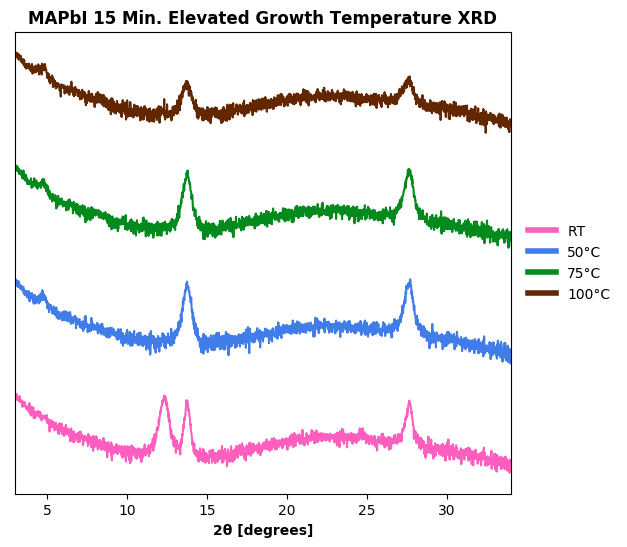

In [20]:
fig = plt.figure(1, figsize=[6.4, 6])
fig_ax = plt.gca()

offset = 0
lbl = None

master_cypher = (
    "15min",
    "15min 50C",
    "15min 75C",
    "15min 100C",
#     "1min",
#     "1min 50C",
#     "1min 75C",
#     "1min 100C",
#     "5min",
#     "5min 50C",
#     "5min 75C",
#     "5min 100C",
)

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in XRD_data[run_ID].keys():
            samplemax = max(np.log10(XRD_data[run_ID][sample_ID]["counts"]))
            
            if "15min" in sample_ID:
                lbl = sample_ID.replace("15min ", "")
            elif "5min" in sample_ID:
                lbl = sample_ID.replace("5min ", "")
            elif "1min" in sample_ID:
                lbl = sample_ID.replace("1min ", "")
            
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
            else:
                lbl = "RT"
            
            plt.figure(1)
            plt.plot(XRD_data[run_ID][sample_ID]["2theta"], np.log10(XRD_data[run_ID][sample_ID]["counts"]) + offset,
                     label=lbl)
            
            offset += samplemax
            
plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(4, rot=2, hue=2, light=0.6, dark=0.2))

plt.xlabel("2θ [degrees]", weight="semibold")

plt.yticks([])

plt.xlim(3, 34)

plt.title("MAPbI 15 Min. Elevated Growth Temperature XRD",weight="semibold")

leg = plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1), mode='expand', frameon=False)
for i in leg.legendHandles:
    i.set_linewidth(4)    

In [21]:
fig.savefig("plots/final/XRD/MAPbI Temp/15min_stacked.png", dpi=200, format='png', bbox_inches='tight')

# PL

In [22]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "pl"

In [23]:
importlib.reload(import_data)
importlib.reload(analysis)

<module 'lib.analysis' from '/home/tomas/Documents/sciencetools_py/lib/analysis.py'>

In [24]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot
pl_data = {}

samples_dir = {
    "etb046": "190904 ETB-046 MAPbI FF/",
    "etb047": "190902 ETB-047 MAPbI FF/",
    "etb048": "190904 ETB-048 MAPbI FF/",
    "etb052": "191115 ETB-052 MAPbI on glass FF Growth Temp/",
    "etb054": "191115 ETB-054 MAPbI on glass FF Growth Temp/",
    "etb056": "191115 ETB-056 MAPbI on glass FF Growth Temp/",
}

for run_ID in samples_dir:
    pl_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.
Creating new local data folder.
Creating new local data folder.
Creating new local data folder.
Creating new local data folder.
Creating new local data folder.


/home/tomas/Documents/sciencetools_py/lib/analysis.py:14: FutureWarning: `item` has been deprecated and will be removed in a future version
  while (input_df.iloc[current_index]['counts'].item() > (local_max['counts'] / 2)):
/home/tomas/Documents/sciencetools_py/lib/analysis.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
  while (input_df.iloc[current_index]['counts'].item() > (local_max['counts'] / 2)):
/home/tomas/Documents/sciencetools_py/lib/analysis.py:27: FutureWarning: `item` has been deprecated and will be removed in a future version
  fwhm = right_bound['wavelength'].item() - left_bound['wavelength'].item()
/home/tomas/Documents/sciencetools_py/lib/analysis.py:31: FutureWarning: `item` has been deprecated and will be removed in a future version
  max_location['wavelength'].item(),


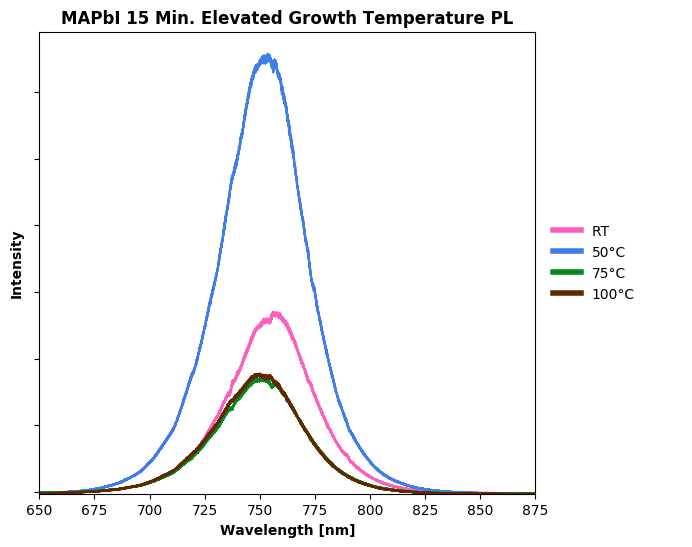

In [31]:
fig3 = plt.figure(1, figsize=[6.4, 6])
fig_ax = plt.gca()

lbl = None

master_cypher = (
    "15min",
    "15min 50C",
    "15min 75C",
    "15min 100C",
#     "1min",
#     "1min 50C",
#     "1min 75C",
#     "1min 100C",
#     "5min",
#     "5min 50C",
#     "5min 75C",
#     "5min 100C",
)

raw_analysis = []

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in pl_data[run_ID].keys():
            raw_analysis.append(analysis.FWHM(flag, sample_ID, pl_data[run_ID][sample_ID]))
            
            if "15min" in sample_ID:
                lbl = sample_ID.replace("15min ", "")
            elif "5min" in sample_ID:
                lbl = sample_ID.replace("5min ", "")
            elif "1min" in sample_ID:
                lbl = sample_ID.replace("1min ", "")
            
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
            else:
                lbl = "RT"
            
            plt.figure(1)
            plt.plot(pl_data[run_ID][sample_ID]["wavelength"], pl_data[run_ID][sample_ID]["counts"],
#                      abs(max(pl_data[run_ID][sample_ID]["counts"])),
                     label=lbl)
        else:
            pass

max_values = pd.DataFrame(data=raw_analysis,columns=['Sample', 'Max_Wavelength', 'Max_Value', 'FWHM'])

plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(4, rot=2, hue=2, light=0.6, dark=0.2))

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Intensity", weight="semibold")

fig_ax.set_yticklabels([])

plt.xlim(650,875)

fig_ax.set_ylim(bottom=-50)

plt.title("MAPbI 15 Min. Elevated Growth Temperature PL",weight="semibold")

leg = plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.3,1),mode='expand', frameon=False)
for i in leg.legendHandles:
    i.set_linewidth(4)     

In [32]:
fig3.savefig("plots/final/PL/MAPbI Temp/15min_all.png", dpi=200, format='png', bbox_inches='tight')

In [33]:
max_values.to_csv('plots/final/PL/MAPbI Temp/15min_all.csv')

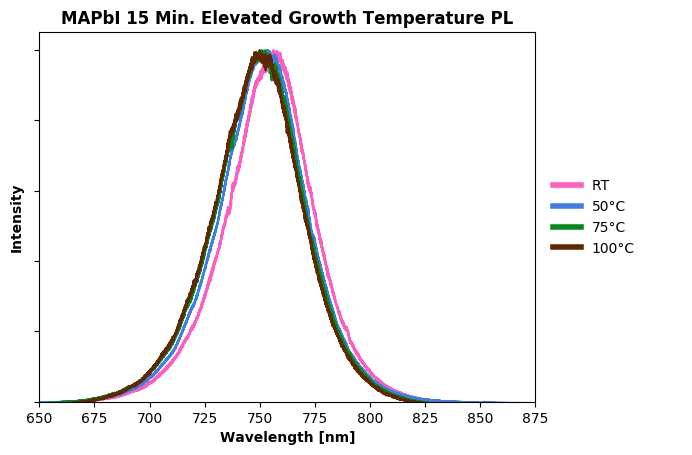

In [43]:
fig6 = plt.figure(1)
fig_ax = plt.gca()

lbl = None

master_cypher = (
    "15min",
    "15min 50C",
    "15min 75C",
    "15min 100C",
#     "1min",
#     "1min 50C",
#     "1min 75C",
#     "1min 100C",
#     "5min",
#     "5min 50C",
#     "5min 75C",
#     "5min 100C",
)

raw_analysis = []

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in pl_data[run_ID].keys():
#             raw_analysis.append(analysis.FWHM(flag, sample_ID, pl_data[run_ID][sample_ID]))
            
            if "15min" in sample_ID:
                lbl = sample_ID.replace("15min ", "")
            elif "5min" in sample_ID:
                lbl = sample_ID.replace("5min ", "")
            elif "1min" in sample_ID:
                lbl = sample_ID.replace("1min ", "")
            
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
            else:
                lbl = "RT"
            
            plt.figure(1)
            plt.plot(pl_data[run_ID][sample_ID]["wavelength"], pl_data[run_ID][sample_ID]["counts"]/
                     abs(max(pl_data[run_ID][sample_ID]["counts"])),
                     label=lbl)
        else:
            pass

max_values = pd.DataFrame(data=raw_analysis,columns=['Sample', 'Max_Wavelength', 'Max_Value', 'FWHM'])

plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(4, rot=2, hue=2, light=0.6, dark=0.2))

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Intensity", weight="semibold")

fig_ax.set_yticklabels([])

plt.xlim(650,875)

fig_ax.set_ylim(bottom=0)

plt.title("MAPbI 15 Min. Elevated Growth Temperature PL",weight="semibold")

leg = plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.3,1),mode='expand', frameon=False)
for i in leg.legendHandles:
    i.set_linewidth(4)     

In [44]:
fig6.savefig("plots/final/PL/MAPbI Temp/15min_all_norm.png", dpi=200, format='png', bbox_inches='tight')

# UV-Vis

In [45]:
pt.wipe_scrap()

    # Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "uvvis"

In [46]:
importlib.reload(import_data);

In [47]:
# Identify the folder(s) where the raw, original data is
# Use a dict to store multiple directories that you want ready to plot
uv_data = {}

samples_dir = {
    "etb046": "190904 ETB-046 MAPbI on glass FF/",
    "etb047": "190902 ETB-047 MAPbI on glass FF/",
    "etb048": "190904 ETB-048 MAPbI on glass FF/",
    "etb052": "191115 ETB-052 MAPbI on glass FF Growth Temp/",
    "etb054": "191115 ETB-054 MAPbI on glass FF Growth Temp/",
    "etb056": "191115 ETB-056 MAPbI on glass FF Growth Temp/",
}

for run_ID in samples_dir.keys():
    uv_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.
Creating new local data folder.
Creating new local data folder.
Creating new local data folder.
Creating new local data folder.
Creating new local data folder.


In [14]:
# Expression to find where index = X nm for normalizing later
uv_data["etb044"]['1min'].index[uv_data["etb044"]['1min']['wavelength'] == 550]

Int64Index([250], dtype='int64')

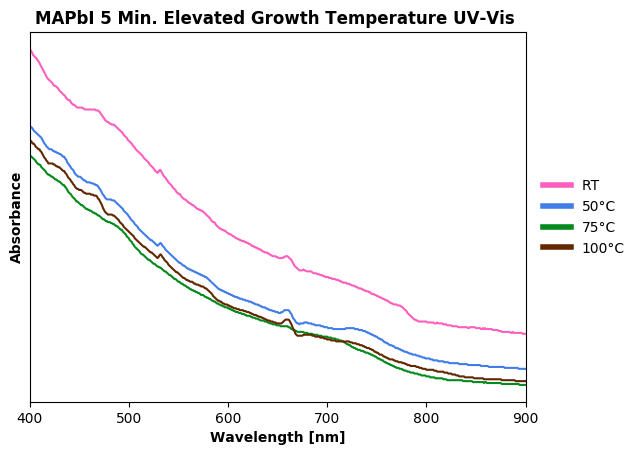

In [53]:
fig4 = plt.figure(1)
fig_ax = plt.gca()

plotted = None
localmax = 0
lbl = []

aster_cypher = (
#     "15min",
#     "15min 50C",
#     "15min 75C",
#     "15min 100C",
#     "1min",
#     "1min 50C",
#     "1min 75C",
#     "1min 100C",
    "5min",
    "5min 50C",
    "5min 75C",
    "5min 100C",
)

for sample_ID in master_cypher:
    
    for run_ID in samples_dir.keys():
        if sample_ID in uv_data[run_ID].keys() and plotted != True:
            
#             localmax = uv_data[run_ID][sample_ID]["abs"].loc[50:120].max()
            
            if "15min" in sample_ID:
                lbl = sample_ID.replace("15min ", "")
            elif "5min" in sample_ID:
                lbl = sample_ID.replace("5min ", "")
            elif "1min" in sample_ID:
                lbl = sample_ID.replace("1min ", "")
            
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
            else:
                lbl = "RT"
                
            plt.figure(1)
            plt.plot(uv_data[run_ID][sample_ID]["wavelength"], uv_data[run_ID][sample_ID]["abs"],
#                      abs(uv_data[run_ID][sample_ID]["abs"].min()),
#                      localmax,
                     label=lbl)
            
            plotted = True
            localmax = 0
        else:
            pass
    
    plotted = False

plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(4, rot=2, hue=2, light=0.6, dark=0.2))

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Absorbance", weight="semibold")

plt.yticks([])

plt.xlim(400, 900)

plt.title("MAPbI 5 Min. Elevated Growth Temperature UV-Vis ",weight="semibold")

leg = plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1), mode='expand', frameon=False)
for i in leg.legendHandles:
    i.set_linewidth(4)   

In [87]:
uv_data["etb070"]["120min"]["abs"].loc[50:120].max()

1.1840000000000002

In [54]:
fig4.savefig("plots/final/UVVIS/MAPbI Temp/5min_cleaned.png", dpi=200, format='png', bbox_inches='tight')